##### The Objective:,
    Indentify Patterns of appliance from UCI ,
    Individual household electric power consumption Data Set,
    https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption,
    ##### Version 3,
    ##### 14/02/2020
    
    Create Data frame for the task of find patterns in the data

##### Load Data set


In [1]:
import pandas as pd

UCI_IHC_DF = pd.read_csv('C:/Users/pe-cb\\Documents/Projects-onJupyterN/EnergyConsumption_detectApliance/Data/household_power_consumption/household_power_consumption.txt',
                             sep = ';', # is separeted by 
                             header = 0,
                             na_filter=True,
                             na_values= '?') # Nan is ? in the data set

In [69]:
print(UCI_IHC_DF.dtypes)
print(UCI_IHC_DF.columns)
UCI_IHC_DF.isnull().sum()
print("Attribute Information: \n 1.date:.Date in format dd/mm/yyyy \n 2.time: time in format hh:mm:ss \n 3.global_active_power: household global minute-averaged active power (in kilowatt) \n 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) \n 5.voltage: minute-averaged voltage (in volt) \n 6.global_intensity: household global minute-averaged current intensity (in ampere) \n 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy).\n It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).\n 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy).\n It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. \n 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy).\n It corresponds to an electric water-heater and an air-conditioner."),
UCI_IHC_DF.head()

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object
Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
Attribute Information: 
 1.date:.Date in format dd/mm/yyyy 
 2.time: time in format hh:mm:ss 
 3.global_active_power: household global minute-averaged active power (in kilowatt) 
 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
 5.voltage: minute-averaged voltage (in volt) 
 6.global_intensity: household global minute-averaged current intensity (in ampere) 
 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy).
 It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


##### Create a Date Time column where date + time columns are mixed for time series

In [3]:
UCI_IHC_DF['DateTime'] = UCI_IHC_DF['Date'].str.cat(UCI_IHC_DF['Time'], sep=' ') # is possible to cat multiple columns 
UCI_IHC_DF.drop(['Date', 'Time'], axis=1, inplace=True)

##### Define DataTime as index and as a time series object

In [4]:
UCI_IHC_DF['DateTime'] = pd.to_datetime(UCI_IHC_DF['DateTime'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)
UCI_IHC_DF.set_index('DateTime',inplace=True)

# exclude NAN

UCI_IHC_DF.dropna(inplace=True,axis=0)

Text(0.5, 0.98, 'Sub_m_3 Pattern by Minute per day')

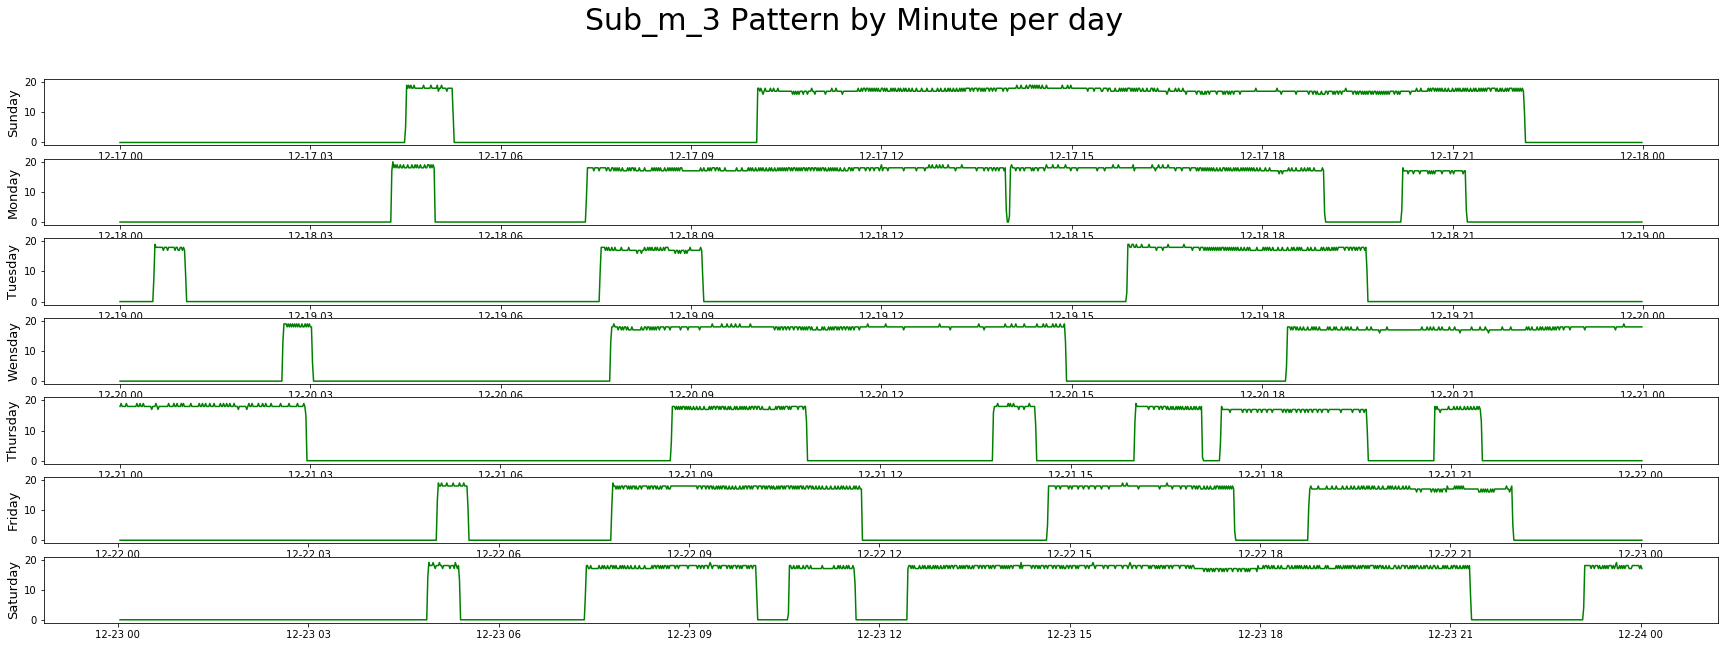

In [66]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=7, ncols=1, sharex=False, sharey=True, figsize=(30,10))

axs[0].plot_date(UCI_IHC_DF.index[396:1836], UCI_IHC_DF.Sub_metering_3.iloc[396:1836],fmt='-g' )


axs[0].xaxis.set_tick_params( labelsize=10)
axs[0].set_ylabel('Sunday',fontdict={'fontsize': 13})

axs[1].plot_date(UCI_IHC_DF.index[1836:3276], UCI_IHC_DF.Sub_metering_3.iloc[1836:3276],fmt='-g' )


axs[1].xaxis.set_tick_params( labelsize=10)
axs[1].set_ylabel('Monday',fontdict={'fontsize': 13})

axs[2].plot_date(UCI_IHC_DF.index[3276:4716], UCI_IHC_DF.Sub_metering_3.iloc[3276:4716],fmt='-g' )


axs[2].xaxis.set_tick_params( labelsize=10)
axs[2].set_ylabel('Tuesday',fontdict={'fontsize': 13})

axs[3].plot_date(UCI_IHC_DF.index[4716:6156], UCI_IHC_DF.Sub_metering_3.iloc[4716:6156],fmt='-g' )


axs[3].xaxis.set_tick_params( labelsize=10)
axs[3].set_ylabel('Wensday',fontdict={'fontsize': 13})

axs[4].plot_date(UCI_IHC_DF.index[6156:7596], UCI_IHC_DF.Sub_metering_3.iloc[6156:7596],fmt='-g' )


axs[4].xaxis.set_tick_params( labelsize=10)
axs[4].set_ylabel('Thursday',fontdict={'fontsize': 13})

axs[5].plot_date(UCI_IHC_DF.index[7596:9036], UCI_IHC_DF.Sub_metering_3.iloc[7596:9036],fmt='-g' )


axs[5].xaxis.set_tick_params( labelsize=10)
axs[5].set_ylabel('Friday',fontdict={'fontsize': 13})

axs[6].plot_date(UCI_IHC_DF.index[9036:10476], UCI_IHC_DF.Sub_metering_3.iloc[9036:10476],fmt='-g' )


axs[6].xaxis.set_tick_params( labelsize=10)
axs[6].set_ylabel('Saturday',fontdict={'fontsize': 13})


fig.suptitle('Sub_m_3 Pattern by Minute per day', fontsize = 30)


##### The idea

My idea is to create a model that will use the last minutes from the data to find predict the patterns in the data

For that I need to create a data frame where the each minute is store in a different columns

In [75]:
import numpy as np
from itertools import cycle

# Create the empty data frame

subm3_pattern_df = pd.DataFrame(columns= range(0,10), index=range(0,6*24*30*3))

# Control the row in the empty data frame

row10 = 0

for obs, column in zip(range(0,(10*6*24*30*3)), cycle(range(0,10))): # go togheter the size of the data frame + every one of the columns
    if obs%10 == 0 and obs != 0 :
        row10 += 1
    subm3_pattern_df.iloc[row10,column] = UCI_IHC_DF.Sub_metering_3.iloc[obs]
    

In [76]:
subm3_pattern_df.to_csv('~\Documents\Projects-onJupyterN\EnergyConsumption_detectApliance\Data\subm3_pattern.csv', sep=',')